# Introduction to NLP

In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_md')

## Word Embeddings

In [3]:
def vec(word, nlp=nlp):
    return nlp.vocab[word].vector
def vecs(words, nlp=nlp):
    if isinstance(words, str):
        words = words.split()
    return np.stack([ vec(word) for word in words ])

In [4]:
words = 'man woman king queen'.split()
matrix = vecs(words)

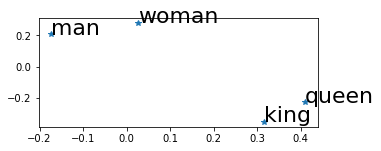

In [5]:
plt.figure(figsize = (5,2))
ax = plt.plot(matrix[:,0], matrix[:,1], '*')
for i, word in enumerate(words): plt.text(matrix[i,0], matrix[i,1], word, size=22)

In [6]:
def most_similar(v, n=10, nlp=nlp):
    k,r,s = nlp.vocab.vectors.most_similar( v.reshape(1,-1), n=n)
    return pd.DataFrame([ {'word': nlp.vocab[K].text, 'similarity': S} for K,R,S in zip(k[0],r[0],s[0]) ])
most_similar(vec('king') - vec('man') + vec('woman'))

,word,similarity
0,King,0.8024
1,KIng,0.8024
2,Queen,0.7881
3,QUEEN,0.7881
4,COMMONER,0.6401
5,Prince,0.6401
6,Kings,0.6209
7,SULTANS,0.6209
8,Princess,0.6126
9,PRINCESSES,0.6126


In [13]:
most_similar((vec('january') + vec('february') + vec('march'))/3)

,word,similarity
0,JANUARY,0.9422
1,prweb,0.9355
2,OCTOBER,0.9272
3,JULY,0.9107
4,SEPT,0.9013
5,AUGUST,0.8898
6,Augusti,0.8769
7,DECEMBER,0.8766
8,desember,0.8751
9,AUGUSTUS,0.8358


## Linguistic features

In [7]:
doc = nlp("The quick fox jumped over a tree")

In [8]:
def show_tokens(doc):
    return pd.DataFrame( {
        'text':tok.text, 'lemma': tok.lemma_,
        'POS': tok.pos_,
        'head': tok.head,
        'dep': tok.dep_, 'dep_explain': spacy.explain(tok.dep_),
        'is_stop': tok.is_stop,
        'tag': tok.tag_, 'tag_explain': spacy.explain(tok.tag_),
    } for tok in doc)
show_tokens(doc)

,text,lemma,POS,head,dep,dep_explain,is_stop,tag,tag_explain
0,The,the,DET,fox,det,determiner,True,DT,determiner
1,quick,quick,ADJ,fox,amod,adjectival modifier,False,JJ,adjective
2,fox,fox,NOUN,jumped,nsubj,nominal subject,False,NN,"noun, singular or mass"
3,jumped,jump,VERB,jumped,ROOT,None,False,VBD,"verb, past tense"
4,over,over,ADP,jumped,prep,prepositional modifier,True,IN,"conjunction, subordinating or preposition"
5,a,a,DET,tree,det,determiner,True,DT,determiner
6,tree,tree,NOUN,over,pobj,object of preposition,False,NN,"noun, singular or mass"


In [9]:
def show_ner(doc):
    return pd.DataFrame( {
        'text':ner.text, 'label': ner.label_, 'label_explain': spacy.explain(ner.label_)
    } for ner in doc.ents)
show_ner(nlp("Zurich is in Switzerland"))

,text,label,label_explain
0,Zurich,GPE,"Countries, cities, states"
1,Switzerland,GPE,"Countries, cities, states"


In [10]:
spacy.displacy.render(doc)

In [11]:
spacy.displacy.render(nlp("Zurich is in Switzerland"), 'ent')

In [14]:
spacy.displacy.render(nlp("Google is in Mountain View, Apple in Cupertino"), 'ent')

In [16]:
show_ner(nlp("Google is in Mountain View, Apple in Cupertino"))

,text,label,label_explain
0,Google,ORG,"Companies, agencies, institutions, etc."
1,Mountain View,FAC,"Buildings, airports, highways, bridges, etc."
2,Apple,ORG,"Companies, agencies, institutions, etc."
3,Cupertino,GPE,"Countries, cities, states"
